In [1]:
import os,re,csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential,load_model
from keras.layers import Dense,LSTM,Embedding

Using TensorFlow backend.
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type

In [24]:
# source text
data = """ Where the old men pray\n
        His children lived next door\n
        They used to live in the woods\n
        But this man's religious bone\n
        He didn't have a prayer\n
        No, he didn't have a prayer\n
        He just said I've got to find my own way home\n
        And I've got to find my own way home\n
        If I can do the things he says\n
        That I just can't understand\n
        Then I'll just settle down and start living for today\n
        Lord, how I'd love to settle down\n
        And start living for today\n
        Lord, how I'd love to settle down\n
        But I don't have a prayer\n
        I don't have a prayer\n
        No, I don't have a prayer\n
        Sometimes, I think of what a wife must be\n
        And how I hate to do things\n
        That he doesn't have to do\n
        But then somehow, I think of what hope is\n
        And do I have to start\n
        Oh, oh, I'm ready to begin\n
        Oh, how I'd love to settle down\n
        I'm ready, ready, ready\n
        If I can do the things he says\n
        That I just can't understand\n
        Then I'll just settle down and start living for today\n
        Lord, how I'd love to settle down\n
        And I don't have a prayer\n
        No, I don't have a prayer\n
        Always, always start the day\n
        Lord, how I'd love to settle down\n
        I'm ready, ready, ready\n
        If I can do the things he says\n
        That I just can't understand\n
        Then I'll just settle down and start living for today\n
        Lord, how I'd love to settle down\n
        But I don't have a prayer No, I don't have a prayer\n
        I can't do the things he says\n
        That I just can't understand\n
        Then I'll just settle down and start living for today\n """

# integer encode text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded = tokenizer.texts_to_sequences([data])[0]

# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 78


In [25]:
# create word → word sequences
sequences = list()
for i in range(1, len(encoded)):
    sequence = encoded[i-1:i+1]
    sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))

Total Sequences: 287


In [26]:
# split into X and y elements
sequences = np.array(sequences)
X, y = sequences[:,0],sequences[:,1]

# one hot encode outputs
y = to_categorical(y, num_classes=vocab_size)

# define model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1, 10)             780       
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_2 (Dense)              (None, 78)                3978      
Total params: 16,958
Trainable params: 16,958
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit network
history = model.fit(X, y, epochs=500, verbose=2)

Epoch 1/500
 - 9s - loss: 4.3548 - acc: 0.0488
Epoch 2/500
 - 0s - loss: 4.3485 - acc: 0.1568
Epoch 3/500
 - 0s - loss: 4.3417 - acc: 0.1150
Epoch 4/500
 - 0s - loss: 4.3345 - acc: 0.1080
Epoch 5/500
 - 0s - loss: 4.3259 - acc: 0.1010
Epoch 6/500
 - 0s - loss: 4.3157 - acc: 0.1115
Epoch 7/500
 - 0s - loss: 4.3036 - acc: 0.1220
Epoch 8/500
 - 0s - loss: 4.2895 - acc: 0.1220
Epoch 9/500
 - 0s - loss: 4.2717 - acc: 0.1220
Epoch 10/500
 - 0s - loss: 4.2504 - acc: 0.1429
Epoch 11/500
 - 0s - loss: 4.2250 - acc: 0.1429
Epoch 12/500
 - 0s - loss: 4.1934 - acc: 0.1289
Epoch 13/500
 - 0s - loss: 4.1579 - acc: 0.1359
Epoch 14/500
 - 0s - loss: 4.1145 - acc: 0.1429
Epoch 15/500
 - 0s - loss: 4.0666 - acc: 0.1429
Epoch 16/500
 - 0s - loss: 4.0095 - acc: 0.1672
Epoch 17/500
 - 0s - loss: 3.9489 - acc: 0.1533
Epoch 18/500
 - 0s - loss: 3.8815 - acc: 0.1568
Epoch 19/500
 - 0s - loss: 3.8117 - acc: 0.1672
Epoch 20/500
 - 0s - loss: 3.7373 - acc: 0.1777
Epoch 21/500
 - 0s - loss: 3.6633 - acc: 0.1951
E

Epoch 171/500
 - 0s - loss: 0.6659 - acc: 0.7631
Epoch 172/500
 - 0s - loss: 0.6638 - acc: 0.7631
Epoch 173/500
 - 0s - loss: 0.6629 - acc: 0.7631
Epoch 174/500
 - 0s - loss: 0.6611 - acc: 0.7596
Epoch 175/500
 - 0s - loss: 0.6609 - acc: 0.7596
Epoch 176/500
 - 0s - loss: 0.6585 - acc: 0.7631
Epoch 177/500
 - 0s - loss: 0.6577 - acc: 0.7561
Epoch 178/500
 - 0s - loss: 0.6566 - acc: 0.7596
Epoch 179/500
 - 0s - loss: 0.6556 - acc: 0.7596
Epoch 180/500
 - 0s - loss: 0.6550 - acc: 0.7631
Epoch 181/500
 - 0s - loss: 0.6536 - acc: 0.7596
Epoch 182/500
 - 0s - loss: 0.6520 - acc: 0.7596
Epoch 183/500
 - 0s - loss: 0.6524 - acc: 0.7526
Epoch 184/500
 - 0s - loss: 0.6509 - acc: 0.7526
Epoch 185/500
 - 0s - loss: 0.6496 - acc: 0.7491
Epoch 186/500
 - 0s - loss: 0.6493 - acc: 0.7596
Epoch 187/500
 - 0s - loss: 0.6473 - acc: 0.7561
Epoch 188/500
 - 0s - loss: 0.6468 - acc: 0.7596
Epoch 189/500
 - 0s - loss: 0.6461 - acc: 0.7631
Epoch 190/500
 - 0s - loss: 0.6453 - acc: 0.7596
Epoch 191/500
 - 0s 

 - 0s - loss: 0.6046 - acc: 0.7596
Epoch 339/500
 - 0s - loss: 0.6046 - acc: 0.7561
Epoch 340/500
 - 0s - loss: 0.6056 - acc: 0.7561
Epoch 341/500
 - 0s - loss: 0.6058 - acc: 0.7526
Epoch 342/500
 - 0s - loss: 0.6038 - acc: 0.7631
Epoch 343/500
 - 0s - loss: 0.6041 - acc: 0.7596
Epoch 344/500
 - 0s - loss: 0.6055 - acc: 0.7526
Epoch 345/500
 - 0s - loss: 0.6044 - acc: 0.7561
Epoch 346/500
 - 0s - loss: 0.6039 - acc: 0.7631
Epoch 347/500
 - 0s - loss: 0.6043 - acc: 0.7526
Epoch 348/500
 - 0s - loss: 0.6049 - acc: 0.7561
Epoch 349/500
 - 0s - loss: 0.6036 - acc: 0.7526
Epoch 350/500
 - 0s - loss: 0.6036 - acc: 0.7561
Epoch 351/500
 - 0s - loss: 0.6037 - acc: 0.7596
Epoch 352/500
 - 0s - loss: 0.6035 - acc: 0.7596
Epoch 353/500
 - 0s - loss: 0.6039 - acc: 0.7596
Epoch 354/500
 - 0s - loss: 0.6028 - acc: 0.7596
Epoch 355/500
 - 0s - loss: 0.6034 - acc: 0.7526
Epoch 356/500
 - 0s - loss: 0.6033 - acc: 0.7561
Epoch 357/500
 - 0s - loss: 0.6030 - acc: 0.7596
Epoch 358/500
 - 0s - loss: 0.6033

In [28]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


In [29]:
# save model
filepath = "model/model_predictwords.h5" # current model is trained by 'GPT2output_test.txt'
model.save(filepath)
if os.path.isfile(filepath):
    print("Saved model to disk")
else:
    print("Failed")

Saved model to disk


In [30]:
# accuracy of model
score = model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 76.31%


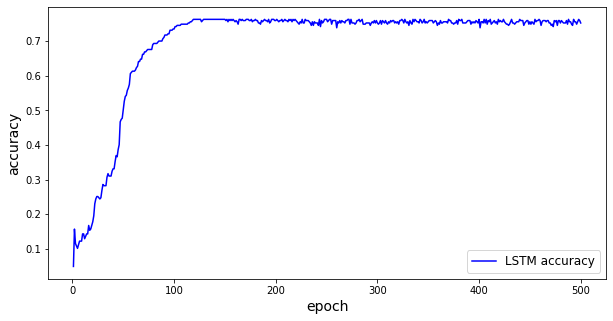

In [31]:
# plot result
plt.figure(figsize=(10,5),linewidth = 1)
plt.plot(range(1,501),history.history['acc'],color = 'b', label="LSTM accuracy")
plt.xlabel("epoch", fontsize= 14)
plt.ylabel("accuracy", fontsize = 14)
plt.legend(loc = "best", fontsize=12)

In [48]:
# generate a sequence from the model
# https://www.kaggle.com/anunnikrishnan/lstm-next-word-prediction-sequence
def generate_seq(model, tokenizer, seed_text, n_words):
    in_text, result = seed_text, seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        encoded = np.array(encoded)
        # predict a word in the vocabulary
        yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if any(index == yhat): # 解決ValueError:https://www.twblogs.net/a/5b8b1c8f2b717718832d5e14
                out_word = word
                break
        # append to input
        in_text, result = out_word, result + ' ' + out_word
    return result

In [96]:
# 讀取output/fix的txt檔案
def read_file(filename):
    places = []
    with open(filename, 'r') as filehandle:
        for line in filehandle:
            currentPlace = line[:-1] # 移除換行符號
            places.append(currentPlace)
    print('Read from ' + filename)
    print(len(places))
    print('places:',places)
    return places

filename = 'output/fix/fixpart01.txt'
places = read_file(filename)

Read from output/fix/fixpart01.txt
8
places: ["I've got to find", "I've got to asset", "don't have a prayer", 'partner must be And', 'And = I hate', 'facing do although then', 'apt to create Oh', 'constraint have a prayer']


In [95]:
# 函式為外掛方式處理後還是有符號的句子
def fix2(result):
    lst_result = result.split(' ') # 原始句子以空格拆分為列表lst_x
    print('lst_result:',lst_result)

    if '+' in lst_result: # 列表lst_x包含'+'
        idx = lst_result.index("+")
    if '=' in lst_result: # 列表lst_x包含'='
        idx = lst_result.index("=")
    print('idx:',idx) # 得到符號的索引值

    if idx == 0: # 符號位於索引值=0
        tmp = '...' # 指定符號'...'
    else: # 符號位於索引值=1以外的值
        tmp = generate_seq(model, tokenizer, lst_result[idx-1], 1) #用符號索引值的前一個位置去預測
    print('tmp:',tmp)

    tmp_word = tmp.split(' ')[1] # 處理後得到的字
    print('tmp_word:',tmp_word)

    lst_result[idx] = tmp_word # 取代原始符號的地方
    print('new lst_x:',lst_result)
    return lst_result

In [97]:
# 迴圈修改歌詞
def modify_lyrics(places):
    fix_result = []
    for v in range(len(places)):
        seed_text = places[v]
        result = generate_seq(model, tokenizer, seed_text, 1)
        print(result)

        # 修改後還是有符號的，處理往回推四個字包含+或=的符號
        if '+' in result or '=' in result:
            print('v:',v,'→',result)
            lst_result = fix2(result)
            lst_result_str = ' '.join(lst_result)
            fix_result.append(lst_result_str)
        else:
            fix_result.append(result)
        print('-'*60)

    print(len(fix_result))
    print('fix_result:',fix_result)
    return fix_result

fix_result = modify_lyrics(places)

I've got to find to
------------------------------------------------------------
I've got to asset to
------------------------------------------------------------
don't have a prayer have
------------------------------------------------------------
partner must be And and
------------------------------------------------------------
And = I hate to
v: 4 → And = I hate to
lst_result: ['And', '=', 'I', 'hate', 'to']
idx: 1
tmp: And start
tmp_word: start
new lst_x: ['And', 'start', 'I', 'hate', 'to']
------------------------------------------------------------
facing do although then the
------------------------------------------------------------
apt to create Oh settle
------------------------------------------------------------
constraint have a prayer a
------------------------------------------------------------
8
fix_result: ["I've got to find to", "I've got to asset to", "don't have a prayer have", 'partner must be And and', 'And start I hate to', 'facing do although then the', 'apt

In [98]:
# 修改後的字詞片段儲存到output/fix的txt檔案(檔名多了'-1')
def save_file(filename,fix_result):
    with open(filename, 'w') as filehandle:
        for listitem in fix_result:
            filehandle.write('%s\n' % listitem)
    print('Save to ' + filename)

filename = 'output/fix/fixpart01-1.txt'
save_file(filename,fix_result)

Save to output/fix/fixpart01-1.txt


# -

In [23]:
# 測試：來源文本(source text)預處理
with open('output/GPT2output_test.txt','r') as fp:
     all_lines = fp.read().splitlines()
for i in range(len(all_lines)):
    if i == len(all_lines)-1:
        print(all_lines[i] + '\\n' + ' """')
    elif i == 0:
        print('""" ' + all_lines[i] + '\\n')
    else:
        print(all_lines[i] + '\\n')

""" Where the old men pray\n
His children lived next door\n
They used to live in the woods\n
But this man's religious bone\n
He didn't have a prayer\n
No, he didn't have a prayer\n
He just said I've got to find my own way home\n
And I've got to find my own way home\n
If I can do the things he says\n
That I just can't understand\n
Then I'll just settle down and start living for today\n
Lord, how I'd love to settle down\n
And start living for today\n
Lord, how I'd love to settle down\n
But I don't have a prayer\n
I don't have a prayer\n
No, I don't have a prayer\n
Sometimes, I think of what a wife must be\n
And how I hate to do things\n
That he doesn't have to do\n
But then somehow, I think of what hope is\n
And do I have to start\n
Oh, oh, I'm ready to begin\n
Oh, how I'd love to settle down\n
I'm ready, ready, ready\n
If I can do the things he says\n
That I just can't understand\n
Then I'll just settle down and start living for today\n
Lord, how I'd love to settle down\n
And I don't ha

In [84]:
# 測試：處理後的文本
data = """ Where the old men pray\n
        His children lived next door\n
        They used to live in the woods\n
        But this man's religious bone\n
        He didn't have a prayer\n
        No, he didn't have a prayer\n
        He just said I've got to find my own way home\n
        And I've got to find my own way home\n
        If I can do the things he says\n
        That I just can't understand\n
        Then I'll just settle down and start living for today\n
        Lord, how I'd love to settle down\n
        And start living for today\n
        Lord, how I'd love to settle down\n
        But I don't have a prayer\n
        I don't have a prayer\n
        No, I don't have a prayer\n
        Sometimes, I think of what a wife must be\n
        And how I hate to do things\n
        That he doesn't have to do\n
        But then somehow, I think of what hope is\n
        And do I have to start\n
        Oh, oh, I'm ready to begin\n
        Oh, how I'd love to settle down\n
        I'm ready, ready, ready\n
        If I can do the things he says\n
        That I just can't understand\n
        Then I'll just settle down and start living for today\n
        Lord, how I'd love to settle down\n
        And I don't have a prayer\n
        No, I don't have a prayer\n
        Always, always start the day\n
        Lord, how I'd love to settle down\n
        I'm ready, ready, ready\n
        If I can do the things he says\n
        That I just can't understand\n
        Then I'll just settle down and start living for today\n
        Lord, how I'd love to settle down\n
        But I don't have a prayer No, I don't have a prayer\n
        I can't do the things he says\n
        That I just can't understand\n
        Then I'll just settle down and start living for today\n """

In [49]:
# 測試：預測下一個字
seed_text = "I've got to asset"
print(generate_seq(model, tokenizer, seed_text, 1))

I've got to asset to


In [80]:
# 測試：外掛方式處理後還是有符號的句子
x = "And = I hate to"
lst_x = x.split(' ') # 原始句子以空格拆分為列表lst_x
print('lst_x:',lst_x)

if '+' in lst_x: # 列表lst_x包含'+'
    idx = lst_x.index("+")
if '=' in lst_x: # 列表lst_x包含'='
    idx = lst_x.index("=")
print('idx:',idx) # 得到符號的索引值

if idx == 0: # 符號位於索引值=0
    tmp = '...' # 指定符號'...'
else: # 符號位於索引值=1以外的值
    tmp = generate_seq(model, tokenizer, lst_x[idx-1], 1) #用符號索引值的前一個位置去預測
print('tmp:',tmp)

tmp_word = tmp.split(' ')[1] # 處理後得到的字
print('tmp_word:',tmp_word)

lst_x[idx] = tmp_word # 取代原始符號的地方
print('new lst_x:',lst_x)

lst_x: ['And', '=', 'I', 'hate', 'to']
idx: 1
tmp: And start
tmp_word: start
new lst_x: ['And', 'start', 'I', 'hate', 'to']


In [88]:
generate_seq(model, tokenizer, 'Oh', 1)

'Oh how'